In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('HumanResources.csv')

# View the first 5 rows
df.head()

,employee_id,first_name,last_name,gender,state,city,hire_date,department,job_title,education_level,performance_rating,overtime,base_salary,salary,birth_date,termination_date
0,00-73695798,Olimpiada,Fedotova,Female,Moscow,Moscow,2017-08-28,Sales,Sales Specialist,Bachelor,Good,No,79104,84511,1994-07-25,NaN
1,00-81018730,Ljubov',Baranova,Female,Moscow,Moscow,2022-05-19,Customer Service,Support Specialist,Bachelor,Satisfactory,Yes,54030,58165,1983-12-04,NaN
2,00-29139495,Mstislav,Trofimov,Male,Moscow,Moscow,2018-04-10,Operations,Operations Analyst,Master,Good,No,55805,60266,1974-05-17,NaN
3,00-60298696,Rodion,Pahomov,Male,Moscow,Moscow,2019-11-11,Sales,Sales Representative,Bachelor,Needs Improvement,No,53844,64566,1995-05-02,NaN
4,00-96356860,Zosima,Naumov,Male,Kazan,Kazan,2023-01-01,Operations,Inventory Specialist,High School,Needs Improvement,No,58672,61998,2004-07-13,NaN


In [3]:
df['attrition'] = df['termination_date'].notna().astype(int)

In [4]:
df.drop(columns=['employee_id', 'first_name', 'last_name', 'termination_date'], inplace=True)

In [5]:
#Data feature enginearing
df['hire_date'] = pd.to_datetime(df['hire_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

df['age'] = (pd.Timestamp.today() - df['birth_date']).dt.days // 365
df['experience_years'] = (pd.Timestamp.today() -df['hire_date']).dt.days // 365

df.drop(columns=['hire_date', 'birth_date'], inplace=True )

In [6]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['overtime'] = df['overtime'].map({'Yes': 1, 'No': 0})

education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}
df['education_level'] = df['education_level'].map(education_map)

performance_map = {
    'Needs Improvement': 1,
    'Satisfactory': 2,
    'Good': 3,
    'Excellent': 4
}
df['performance_rating'] = df['performance_rating'].map(performance_map)

In [7]:
df = pd.get_dummies(
    df,
    columns=['state', 'city', 'department', 'job_title'],
    drop_first=True
)

In [8]:
X = df.drop('attrition', axis=1)
y = df['attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



C:\Users\anush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\anush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\anush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

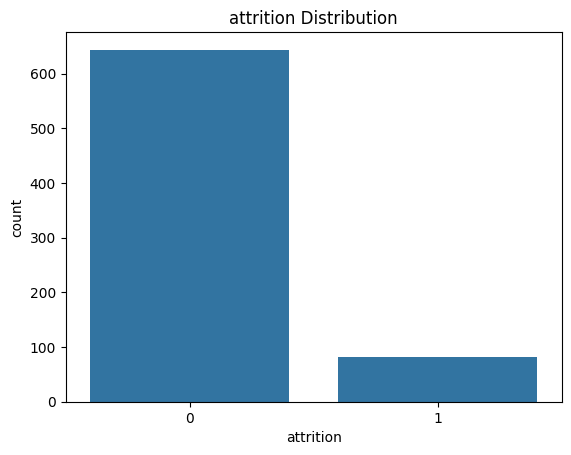

In [13]:
#Attrition Distribution
sns.countplot(x='attrition', data=df)
plt.title("attrition Distribution")
plt.show()

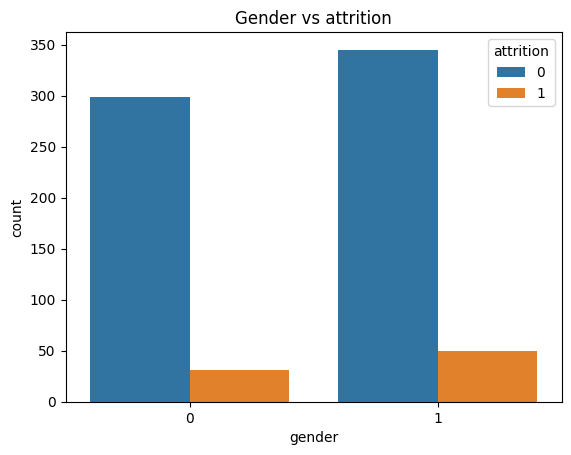

In [14]:
sns.countplot(x='gender', hue='attrition', data=df)
plt.title("Gender vs attrition")
plt.show()

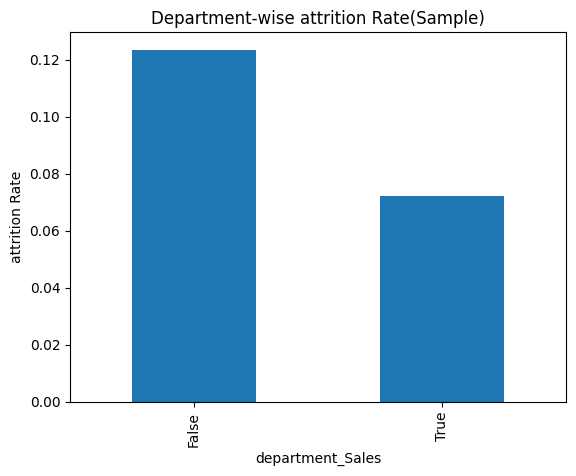

In [15]:
#Department vs attrition
dept_attr = df.groupby('department_Sales')['attrition'].mean()
dept_attr.plot(kind='bar')
plt.title("Department-wise attrition Rate(Sample)")
plt.ylabel("attrition Rate")
plt.show()

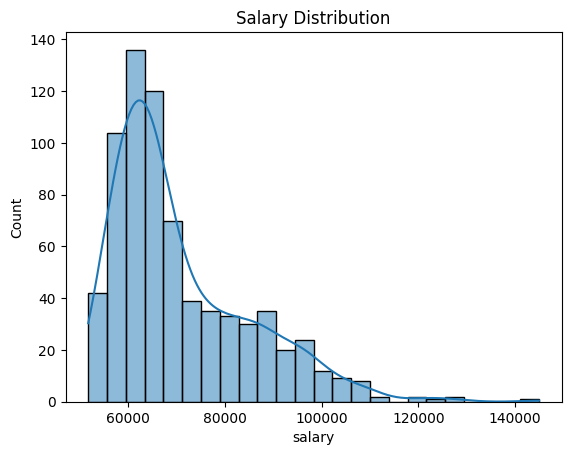

In [19]:
sns.histplot(df['salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

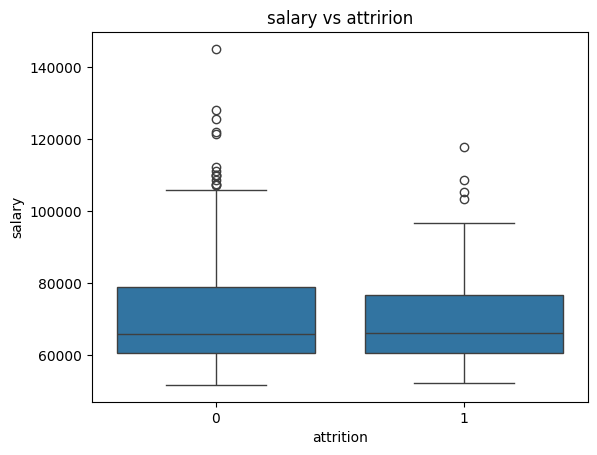

In [20]:
sns.boxplot(x='attrition', y='salary', data=df)
plt.title("salary vs attririon")
plt.show()

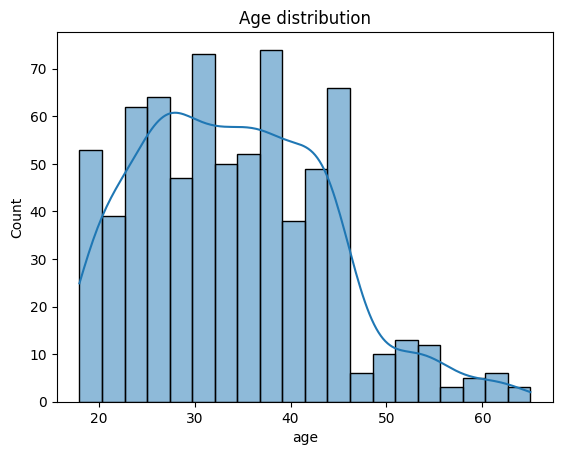

In [21]:
#Age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age distribution")
plt.show()

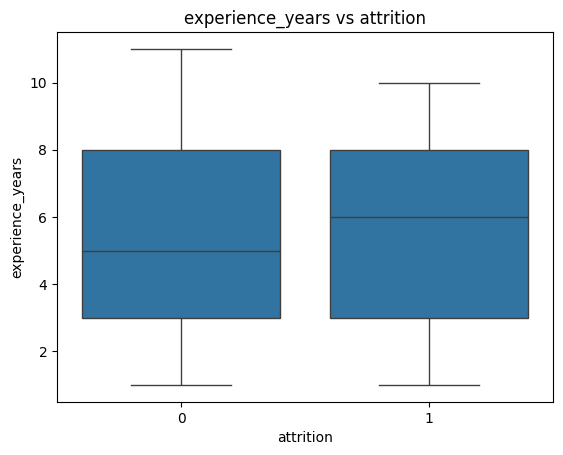

In [22]:
sns.boxplot(x='attrition', y='experience_years', data=df)
plt.title("experience_years vs attrition")
plt.show()

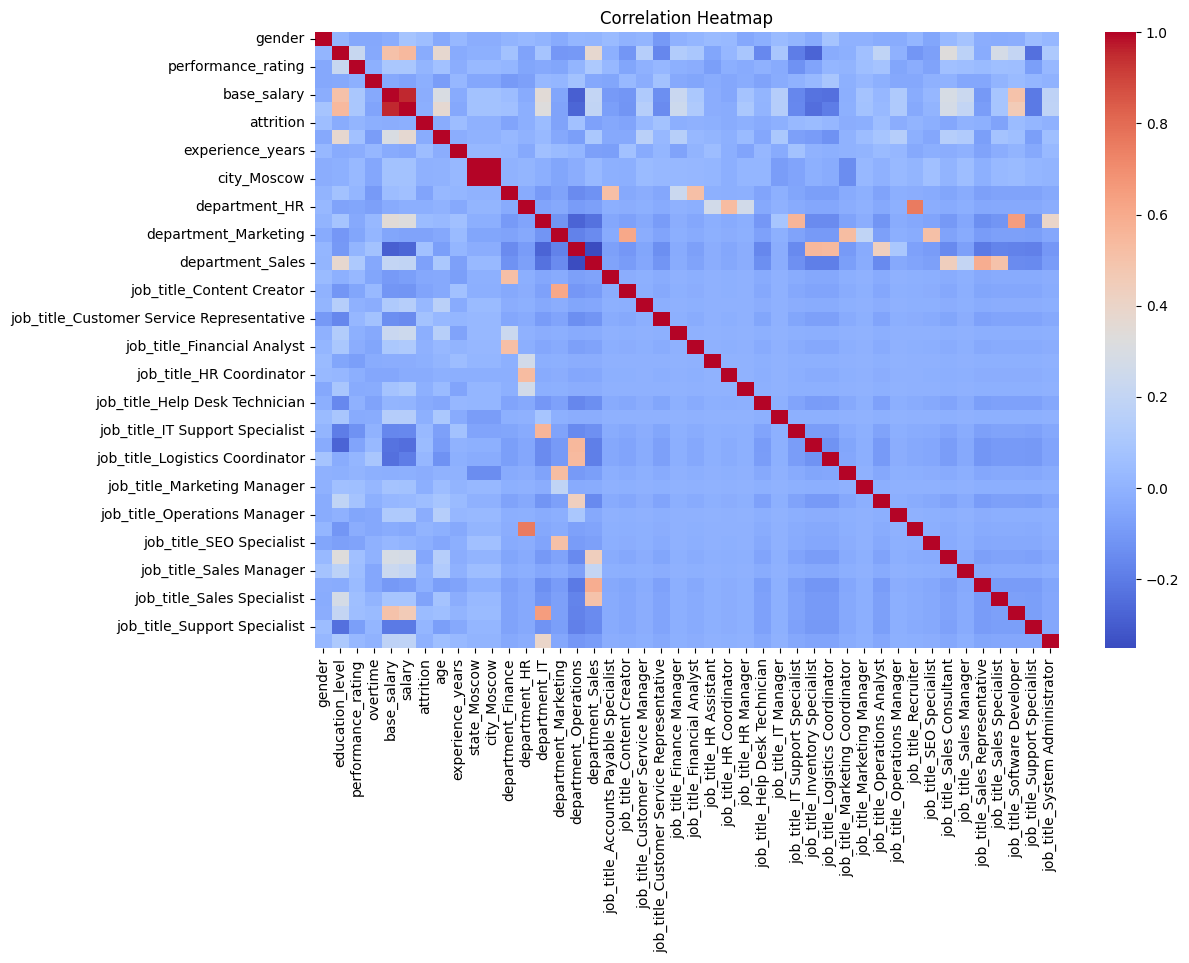

In [23]:
#correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Calculate the difference between total salary and base salary
df['salary_difference'] = df['salary'] - df['base_salary']

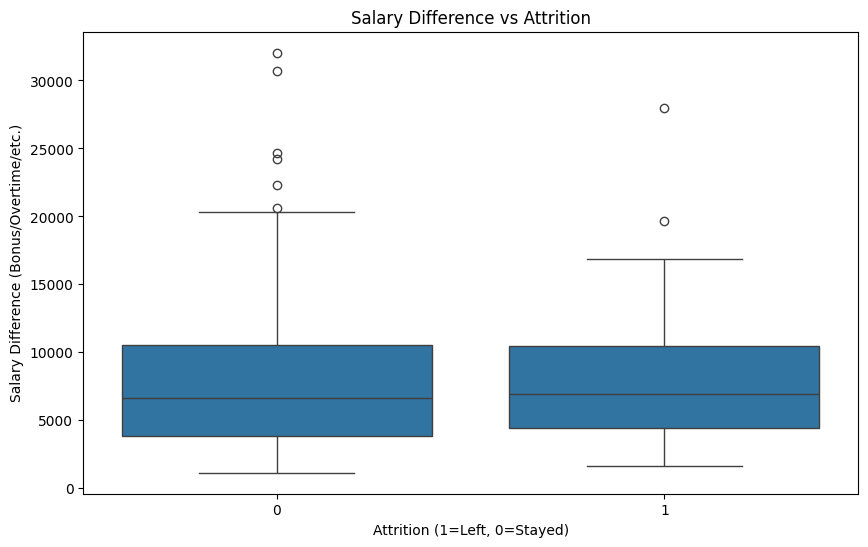

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='salary_difference', data=df)
plt.title("Salary Difference vs Attrition")
plt.xlabel("Attrition (1=Left, 0=Stayed)")
plt.ylabel("Salary Difference (Bonus/Overtime/etc.)")
plt.show()